In [2303]:
import pandas as pd
df1 = pd.read_excel('commons-bcel.xlsx')
df2 = pd.read_excel('commons-codec.xlsx')
df3 = pd.read_excel('commons-vfs.xlsx')
df4 = pd.read_excel('javalin.xlsx')

df = pd.concat([df1,df2, df3 ,df4], axis=0)

In [2304]:
df

,Commit_hash,author_name,msg,author_email,Number_changed_files,file_name,complexity,complexity_old,readibility_old,readibility
0,96ac0670cf9944d4912ab25ec885a4bea651443d,Jason van Zyl,Initial revision\n\n\ngit-svn-id: https://svn....,jvanzyl@apache.org,415,.cvsignore,NaN,NaN,NaN,NaN
1,96ac0670cf9944d4912ab25ec885a4bea651443d,Jason van Zyl,Initial revision\n\n\ngit-svn-id: https://svn....,jvanzyl@apache.org,415,README,NaN,NaN,NaN,NaN
2,96ac0670cf9944d4912ab25ec885a4bea651443d,Jason van Zyl,Initial revision\n\n\ngit-svn-id: https://svn....,jvanzyl@apache.org,415,README.JustIce,NaN,NaN,NaN,NaN
3,96ac0670cf9944d4912ab25ec885a4bea651443d,Jason van Zyl,Initial revision\n\n\ngit-svn-id: https://svn....,jvanzyl@apache.org,415,TODO.JustIce,NaN,NaN,NaN,NaN
4,96ac0670cf9944d4912ab25ec885a4bea651443d,Jason van Zyl,Initial revision\n\n\ngit-svn-id: https://svn....,jvanzyl@apache.org,415,build.xml,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1381,0e23c1cf7ded734395f84c050a35e436ac2c6f4f,dzikoysk,[async] Fix `ctx.async` interopability with Ja...,dzikoysk@dzikoysk.net,6,HelloWorldAsync.java,1.0,NaN,0.145567,0.773594
1382,53165c5820d09854b07f34763257d8671b234b81,Playacem,[javadoc] Add disclaimer to Javalin#updateConf...,playacem@gmail.com,1,Javalin.java,66.0,NaN,0.754163,0.754522
1383,d32a0d1bebd61c4475aaeeb3e21969abb3dbe4b6,dzikoysk,[plugins] Support plugins initialization in Ja...,dzikoysk@dzikoysk.net,8,Javalin.java,66.0,NaN,0.754522,0.753903
1384,db3695a67eda42aa348e0c5e417a084add028060,David,[tests] Move mockito test to correct package,davidaase@hotmail.com,1,TestMockito.java,2.0,NaN,0.439898,0.439898


In [2305]:
df = df.drop(['complexity_old'], axis=1)

In [2306]:
df['Readability_variation']= df['readibility']- df['readibility_old']

In [2307]:
df = df.dropna()

In [2308]:
df = df.groupby('msg')['Readability_variation'].sum().reset_index()

In [2309]:
df

,msg,Readability_variation
0,"""@exception"" -> ""@throws""",0.000010
1,"""Ashcroft"" is also coded as A261.\n\ngit-svn-i...",0.000742
2,"""commented in"" a check that would often fail a...",-0.000084
3,"""resolve Resource"" aka ResourceFileProvider.\n...",-0.099606
4,'guard' against npe's\n\ngit-svn-id: https://s...,0.002167
...,...,...
5024,workaround to handle webdav server where webda...,0.025449
5025,wrong check\n\n\ngit-svn-id: https://svn.apach...,-0.143829
5026,wrongly named file renamed from DeleteEventAbs...,0.031399
5027,wrongly relied on ants Bzip2 implementation in...,0.000000


In [2310]:

print(df[df['Readability_variation'] > 0]['Readability_variation'].mean())
print(df[df['Readability_variation'] < 0]['Readability_variation'].mean())


0.036021883832584374
-0.03724378902568058


In [2311]:
increased_readability = df[df['Readability_variation']
                           > (df[df['Readability_variation'] > 0]['Readability_variation'].mean())]['msg'].unique().tolist()
print(len(increased_readability))


317


In [2312]:
decreased_readability = df[df['Readability_variation']
                           < (df[df['Readability_variation'] < 0]['Readability_variation'].mean()  )]['msg'].unique().tolist()
print(len(decreased_readability))


378


In [2313]:
stable_readability = df[df['Readability_variation']
                        == (0)]['msg'].unique().tolist()
print(len(stable_readability))


794


In [2314]:
len(decreased_readability)

378

In [2315]:
len(stable_readability)


794

In [2316]:
len(df['msg'].unique().tolist())


5029

### Text Cleaning 

In [2317]:
import re

def Clean_text(text):
    """
    Extract words from a string and return them as a list.
    """
    # Replace all non-word characters with whitespace
    text_cleaned = re.sub(r'http\S+|www.\S+', '', text )
    text_cleaned = re.sub(r'\b\w{8}-\w{4}-\w{4}-\w{4}-\w{12}\b', '', text_cleaned)
    text_cleaned = re.sub(r'[^\w\s]', ' ', text_cleaned)
    text_cleaned= text_cleaned.replace('_x000D_','')
    text_cleaned = re.sub(r'\b[A-Fa-f0-9]{32,64}\b', ' ', text_cleaned)
    text_cleaned = re.sub(r'\b[A-Fa-f0-9]{128}\b', ' ', text_cleaned)
    text_cleaned = re.sub(r'\d+', ' ', text_cleaned)
    text_cleaned = text_cleaned.replace('  ', '').replace('\n', ' ')
    
    return text_cleaned

In [2318]:
clean_msg_increased = []
for i in increased_readability:
    clean_msg_increased.append(Clean_text(i))

In [2319]:
clean_msg_increased

['Added FileObject isReadable and isWriteable  Removed AbstractFileObject isReadOnly  Remove dependency on commons io  Remove dependency on excalibur i n   Patch submitted by David Bernard    git svn id ',
 'Added initial support for file listeners  Added FileSystem addListener and removeListener  FileObject  Added delete convenience method  Split createtype into createFolder and createFile  AbstractFileObject  Added detachwhich allows a subclass to force cached state to be invalidated  No longer detaches when the file is createddeletedor the content changes It is now the subclassresponsibility to explicitly detach if it needs to    git svn id ',
 'File replication is now performed as a privileged operation  Made unit tests operational   Patch submitted by Brian Olsen    git svn id ',
 'Got rid of package dependency cycle by moving FileSystemManager configuration code from vfs packageto a subclass of DefaultFileSystemManager in the vfs impl package  Renamed FileSystemManagerFactory to 

In [2320]:
clean_msg_decreased = []
for i in decreased_readability:
    clean_msg_decreased.append(Clean_text(i))

### Stop words removal

In [2321]:
import spacy
en = spacy.load('en_core_web_lg')
sw_spacy = en.Defaults.stop_words

In [2322]:
def remove_sw(clean_msg):
    text_sw=[]
    for i in clean_msg:
        words = [word for word in i.split() if word.lower() not in sw_spacy and len(word)>1]
        new_text = " ".join(words)
        text_sw.append(new_text.lower())
    return text_sw

In [2323]:
text_sw_increased=remove_sw(clean_msg_increased)
text_sw_decreased=remove_sw(clean_msg_decreased)

In [2324]:
text_sw_increased 

['added fileobject isreadable iswriteable removed abstractfileobject isreadonly remove dependency commons io remove dependency excalibur patch submitted david bernard git svn id',
 'added initial support file listeners added filesystem addlistener removelistener fileobject added delete convenience method split createtype createfolder createfile abstractfileobject added detachwhich allows subclass force cached state invalidated longer detaches file createddeletedor content changes subclassresponsibility explicitly detach needs git svn id',
 'file replication performed privileged operation unit tests operational patch submitted brian olsen git svn id',
 'got rid package dependency cycle moving filesystemmanager configuration code vfs packageto subclass defaultfilesystemmanager vfs impl package renamed filesystemmanagerfactory vfs git svn id',
 'renamed fields match sun coding standardgot rid m_ prefix fixed bucketload checkstyle errors tidied imports git svn id',
 'use httpclient files g

### Tokenization

In [2325]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/waleeds/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2326]:
def Tokenization(text_list):
    token_list = []
    for text in text_list:
        tokens = nltk.word_tokenize(text)
        token_list.append(tokens)

    merged_list  = []
    for i in token_list:
        merged_list.extend(i)
        
    return merged_list

In [2327]:
text_tk_increased=Tokenization(text_sw_increased)
text_tk_decreased=Tokenization(text_sw_decreased)

In [2328]:
to_remove_list = ['git', 'apache', 'svn',
                  'id', 'method', 'class', 'don', 'private', 'commons',
                  'use', 'fix', 'add', 'code', 'file', 'provider',
                  'string', 'static', 'added', 'upgrade', 'patch', 'static',
                  'package', 'instead', 'case', 'thread', 'new', 'final','test','remove']


def remove_unwanted_words(text_list):
    words = [word for word in text_list if word.lower() not in to_remove_list]
    return words


In [2329]:
def words_frequency(word_list):
    freq_dict = {}
    for word in word_list:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1

    sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

    return sorted_freq

In [2330]:
nltk.download('words') # download the list of English words
english_words = set(nltk.corpus.words.words()) # create a set of English words

[nltk_data] Downloading package words to /Users/waleeds/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2331]:
def english_filter(word_list):
    english_words_list = [word for word in word_list  if word.lower() in english_words]
    return english_words_list

In [2332]:
text_f_increased = remove_unwanted_words(text_tk_increased)
text_f_decreased = remove_unwanted_words(text_tk_decreased)



In [2333]:
text_en_increased = english_filter(text_f_increased)
text_en_decreased = english_filter(text_f_decreased)


In [2334]:
text_en_decreased

['resolve',
 'meta',
 'license',
 'internal',
 'dont',
 'know',
 'dont',
 'want',
 'adjust',
 'treat',
 'fact',
 'found',
 'solution',
 'query',
 'prefix',
 'process',
 'con',
 'scheme',
 'set',
 'room',
 'cleanup',
 'way',
 'internally',
 'generally',
 'base',
 'tar',
 'special',
 'handling',
 'query',
 'null',
 'base',
 'exist',
 'correctly',
 'space',
 'net',
 'backward',
 'compatible',
 'script',
 'archive',
 'load',
 'list',
 'hard',
 'allow',
 'load',
 'set',
 'better',
 'ephemeral',
 'searching',
 'free',
 'port',
 'end',
 'extract',
 'port',
 'extract',
 'port',
 'action',
 'morse',
 'phonetic',
 'matching',
 'incorrect',
 'action',
 'missing',
 'action',
 'override',
 'snow',
 'sandbox',
 'module',
 'option',
 'support',
 'ask',
 'client',
 'certificate',
 'recreate',
 'round',
 'trip',
 'sure',
 'set',
 'match',
 'ability',
 'capability',
 'logging',
 'io',
 'missing',
 'extension',
 'utility',
 'support',
 'command',
 'set',
 'support',
 'transfer',
 'aborted',
 'status',
 '

In [2335]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer algorithm
stemmer = PorterStemmer()

In [2336]:
def stemming_list(word_list):
    stem_list=[]
    for token in word_list:
        stem = stemmer.stem(token)
        stem_list.append(stem)
    return stem_list

In [2337]:
text_st_increased = stemming_list(text_en_increased)
text_st_decreased = stemming_list(text_en_decreased)

In [2338]:
text_fr_increased = words_frequency(text_st_increased)
text_fr_decreased = words_frequency(text_st_decreased)
print(text_fr_decreased)
print(text_fr_increased)


[('set', 18), ('allow', 16), ('better', 14), ('configur', 14), ('support', 13), ('resourc', 13), ('base', 11), ('type', 11), ('local', 10), ('format', 10), ('handl', 9), ('port', 9), ('coverag', 9), ('replac', 9), ('miss', 8), ('work', 8), ('unus', 8), ('equal', 8), ('check', 8), ('camel', 8), ('cach', 8), ('intern', 7), ('load', 7), ('default', 7), ('avoid', 7), ('need', 7), ('assert', 7), ('simplifi', 7), ('clean', 7), ('except', 7), ('junction', 7), ('parent', 7), ('path', 7), ('extract', 6), ('io', 6), ('object', 6), ('class', 6), ('line', 6), ('root', 6), ('content', 6), ('resolv', 5), ('gener', 5), ('compat', 5), ('match', 5), ('capabl', 5), ('user', 5), ('basic', 5), ('unit', 5), ('non', 5), ('fix', 5), ('improv', 5), ('constant', 5), ('proxi', 5), ('chang', 5), ('depend', 5), ('creat', 5), ('updat', 5), ('implement', 5), ('commit', 5), ('normal', 5), ('pass', 5), ('trail', 5), ('strict', 5), ('queri', 4), ('scheme', 4), ('way', 4), ('special', 4), ('correctli', 4), ('list', 4),

### WordCloud

In [2339]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



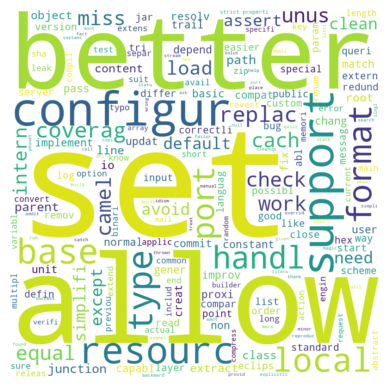

In [2340]:
# Prepare the textual data
text_data = ' '.join(text_st_decreased)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white', stopwords=[]).generate(text_data)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

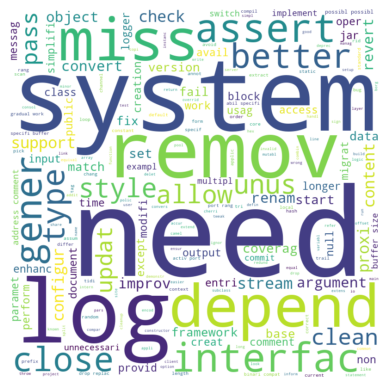

In [2341]:
# Prepare the textual data
text_data = ' '.join(text_st_increased)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=[]).generate(text_data)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [2342]:
print(text_fr_decreased)
print(text_fr_increased)
print(len(text_en_decreased))
print(len(text_en_increased))


[('set', 18), ('allow', 16), ('better', 14), ('configur', 14), ('support', 13), ('resourc', 13), ('base', 11), ('type', 11), ('local', 10), ('format', 10), ('handl', 9), ('port', 9), ('coverag', 9), ('replac', 9), ('miss', 8), ('work', 8), ('unus', 8), ('equal', 8), ('check', 8), ('camel', 8), ('cach', 8), ('intern', 7), ('load', 7), ('default', 7), ('avoid', 7), ('need', 7), ('assert', 7), ('simplifi', 7), ('clean', 7), ('except', 7), ('junction', 7), ('parent', 7), ('path', 7), ('extract', 6), ('io', 6), ('object', 6), ('class', 6), ('line', 6), ('root', 6), ('content', 6), ('resolv', 5), ('gener', 5), ('compat', 5), ('match', 5), ('capabl', 5), ('user', 5), ('basic', 5), ('unit', 5), ('non', 5), ('fix', 5), ('improv', 5), ('constant', 5), ('proxi', 5), ('chang', 5), ('depend', 5), ('creat', 5), ('updat', 5), ('implement', 5), ('commit', 5), ('normal', 5), ('pass', 5), ('trail', 5), ('strict', 5), ('queri', 4), ('scheme', 4), ('way', 4), ('special', 4), ('correctli', 4), ('list', 4),

In [2344]:
print(len(df))
with_list = ['simplifi']

with_df = df[df['msg'].str.contains('|'.join(with_list))]
without_df = df[~df['msg'].str.contains('|'.join(with_list))]
print(len(with_df))
print(len(without_df))
print(len(without_df)+len(with_df))
(with_df['msg'])


5029
4
5025
5029


486     Avoid use toString() or substring() in favor o...
487     Avoid use toString() or substring()in favor of...
567     BCEL-343 JUnit Assertion improvement (#69)\n\n...
3647    [CODEC-174] Small (2.3%) but consistent perfor...
Name: msg, dtype: object

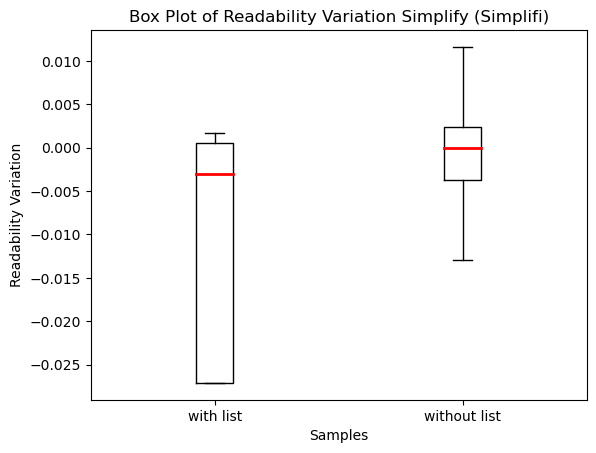

In [2345]:
import matplotlib.pyplot as plt
import numpy as np


data = [with_df['Readability_variation'], without_df['Readability_variation']]
plt.boxplot(data, showfliers=False, medianprops=dict(color='red', linewidth=2))

plt.title('Box Plot of Readability Variation Simplify (Simplifi)')
plt.xticks([1, 2], ['simplifi', '-simplifi'])
plt.xlabel('Samples')
plt.ylabel('Readability Variation')

# Show the plot
plt.show()
